<a href="https://colab.research.google.com/github/muntazirabidi/machine_learning_tutorials/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Dataset

MNIST (Modified National Institute of Standards and Technology) is a dataset of images of handwritten digits, originally developed by Yann LeCun and his team at the Department of Computer Science and Electrical Engineering at the University of Maryland. The dataset is often used to train and evaluate machine learning models for image classification tasks. It consists of a training set of 60,000 images and a test set of 10,000 images, all of which are 28x28 grayscale images of handwritten digits from 0 to 9. The images are pre-processed and normalized, and the task is to classify each image into one of the 10 digit classes. MNIST is a widely used dataset in the field of machine learning and is considered a "Hello, World!" example for image classification algorithms.

scikit-Learn provides manmy helper functions to download popular datasets. MNIST is one of them. 


In [29]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


Next, we can check the `keys` of the mnist dictionary to see what information is included in the dataset

In [30]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

This should return a list of keys, including `'data'`, `'target'`, and others. The 'data' key corresponds to the pixel values of the images, and the `'target'` key corresponds to the class labels for each image.

Next, we can separate the data and the target into separate variables, `X` and` y`, respectively:

In [31]:
import numpy as np
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


This should output `(70000, 784)` for the shape of `X` and `(70000,)` for the shape of `y`, indicating that there are `70,000` images and `784` features `(28x28 pixels)` for each image.

We can also visualize one of the images by reshaping it to a `28x28` array and using Matplotlib's `imshow` function:

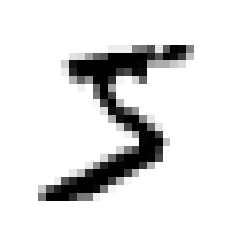

In [32]:
from IPython.display import set_matplotlib_formats
import matplotlib as mpl
import matplotlib.pyplot as plt 
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis('off')
plt.show()

In [36]:
y=y.astype(np.uint8)

In [58]:
X_train, X_test, y_train, y_test = X.to_numpy()[:60000], X.to_numpy()[60000:], y.to_numpy()[:60000], y.to_numpy()[60000:]

# Training a Binary Classifier 



A binary classifier is a machine learning model that makes predictions about a binary outcome. The outcome is either one of two possible classes, labeled as positive or negative. For example, a binary classifier might be used to predict whether an email is spam (positive class) or not spam (negative class). The classifier would be trained on a dataset of labeled emails and would learn to predict the class of an email based on features of the email such as the subject line, the sender, and the content of the message. When given a new email, the classifier would output a prediction of whether the email is spam or not.

Lets only try to identify one digit, lets say 5. This is an example of a binary classifier, distinguishing between just two classes. 

Now that we have explored the MNIST dataset a bit, let's move on to training a classifier. For this tutorial, we will focus on training a binary classifier to distinguish between just two classes: the digit 5 and all other digits.

To do this, we can first create binary labels for the training and test sets by checking whether each label is a 5 or not:

In [59]:
# Binary Classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Next, we can use scikit-learn's `SGDClassifier` to train a classifier on the training data:

In [60]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [67]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

## Measuring Accuracy Using Cross-Validation



After training the classifier, it's important to evaluate its performance. One way to do this is to use cross-validation. This involves dividing the training set into a number of "folds," and training and evaluating the model on different combinations of folds.

We can use scikit-learn's `StratifiedKFold` function to perform stratified k-fold cross-validation, where the proportions of the different classes in the folds are the same as the proportions of the different classes in the entire dataset. This is particularly useful for datasets where the distribution of classes is unbalanced, as it ensures that each fold has a representative ratio of classes.

> `StratifiedKFold` is a K-fold cross-validation iterator that returns stratified folds. Stratified folds means that the proportions of the different classes in the folds are the same as the proportions of the different classes in the entire dataset. This is particularly useful for datasets where the distribution of classes is unbalanced, as it ensures that each fold has a representative ratio of classes. This can be useful in cases where the model's performance depends on the relative proportions of the classes in the training and testing data.


Here's how we can use `StratifiedKFold` to evaluate the performance of our classifier:



In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  #print(train_index, test_index)
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]  

  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))


0.9669
0.91625
0.96785


This will output the accuracy of the classifier on each fold.

Once we have an idea of how well the classifier is performing using cross-validation, we can evaluate its performance on the test set to get a final, unbiased evaluation of the model. To do this, we can use the accuracy_score function from scikit-learn's `metrics` module:

In [69]:
# lets use the build-in function to evaluate the model 

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

This will output the final accuracy of the classifier on the test set. Above 93% accuracy is amazing! But before we get too excited, lets look at a very dumb classifier that just classifies every single digit image in the "not-5" class:

In [75]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

Lets try to find out the accuracy of this classifier. 

In [76]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring= 'accuracy')

array([0.91125, 0.90855, 0.90915])

This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. This shows why accuracy is not a good preferred performance measure for classifiers, especially when you are dealing with skewed datasets.

## Why accuracy is not a good performance measure?

Accuracy is not always the best performance measure for classifiers because it can be misleading in certain cases. For example, consider a binary classifier that is trying to predict whether a patient has a certain disease or not. If the disease is rare, the classifier could simply predict that every patient does not have the disease, and it would be correct most of the time. However, this classifier would not be very useful because it is not able to detect the rare positive cases.

In such cases, it is more informative to look at other performance measures such as precision, recall, and F1 score. Precision measures the proportion of positive predictions that are actually correct, while recall measures the proportion of actual positive cases that were correctly predicted. The F1 score is the harmonic mean of precision and recall, and it is often used as a single metric to evaluate the performance of a classifier.

In summary, accuracy is a useful performance measure, but it can be misleading in cases where the classes are imbalanced or the consequences of false predictions are not the same for both classes. In such cases, it is important to consider other performance measures as well.



# Confusion Matrix




A confusion matrix is a table that is used to evaluate the performance of a classifier. It helps to visualize the number of correct and incorrect predictions made by the classifier and allows you to calculate various performance metrics such as precision, recall, and F1 score.

The confusion matrix is often used in the field of machine learning and data mining. It is a table with two rows and two columns, and contains the following information:

1. **True Positives (TP)**: These are cases where the classifier predicted the positive class, and the true class was also the positive class.
2. **True Negatives (TN)**: These are cases where the classifier predicted the negative class, and the true class was also the negative class.
3. **False Positives (FP)**: These are cases where the classifier predicted the positive class, but the true class was the negative class. These are also known as "Type I errors."
4. **False Negatives (FN)**: These are cases where the classifier predicted the negative class, but the true class was the positive class. These are also known as "Type II errors."

Using the values in the confusion matrix, you can calculate various performance metrics such as precision, recall, and F1 score. For example, **precision is calculated as TP / (TP + FP)**, and **recall is calculated as TP / (TP + FN)**. The F1 score is the harmonic mean of precision and recall.


In [80]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['matrix.png']))

Saving matrix.png to matrix.png


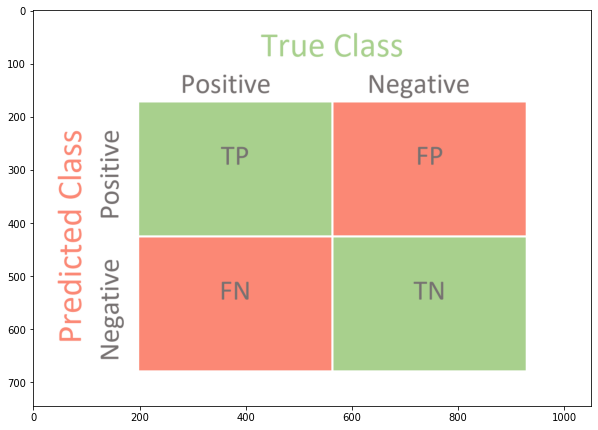

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

In [84]:
#lets compute the confusion matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the `cross_val_score()` functions the `cross_val_predict()` performs K-fold cross-validation but instead of returning the evaluation score it returns the predictions made on each test fold. 

Now we can evaluate the confusion matrix using `confusion_matrix()` fucntion.

In [85]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

This will output a `2x2` confusion matrix

Each row in the confusion matrix represents the actual class. while each column represents a predicted class. 
- The first row of this matrix considers non-5 images (the negative class): 53,057 of them were correctly classified as non-5s (they are called the *true negatives*)
- The remainign 1,522 were wrongly classified as 5s (*false positives*)
- The second row considers the images of 5s (the *positive class*): 1,325 were wrongly classified as non-5s (*false negatives*)
- While the remaining 4,096 were correctly classified as 5s (*true positives*)


**A Perfect classifier would have only True Positives and True Negatives**

In [89]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision & Recall


> Precision and recall are performance measures for classification tasks. Precision is the proportion of correct positive predictions made by the classifier, while recall is the proportion of positive cases that were correctly predicted by the classifier. For example, if the classifier made the following predictions:

> * True positive: 20
* True negative: 1000
* False positive: 50
* False negative: 30

> Then the precision would be calculated as 20 / (20 + 50) = 0.29, and the recall would be calculated as 20 / (20 + 30) = 0.40.

> It's important to note that precision and recall are trade-offs: increasing precision may decrease recall, and vice versa. In some cases, it may be more important to prioritize one over the other, depending on the context and the consequences of false predictions. The F1 score is a metric that combines precision and recall and is often used as a single metric to evaluate the performance of a classifier.

** Recall, also known as sensitivity or the true positive rate (TPR)**

In [102]:
uploaded = files.upload()
im2 = Image.open(BytesIO(uploaded['matrix2.png']))

Saving matrix2.png to matrix2 (1).png


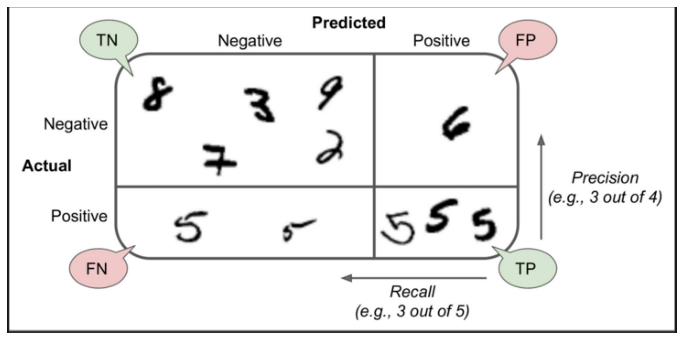

In [105]:
plt.figure(figsize=(12,12))
plt.imshow(im2)
plt.axis('off')
plt.show()

In [92]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) #  == 4096 / (4096 + 1522)

0.8370879772350012

In [95]:
recall_score(y_train_5, y_train_pred) #  == 4096 / (4096 + 1352)

0.6511713705958311

In [97]:
uploaded = files.upload()
im3 = Image.open(BytesIO(uploaded['F1.png']))

Saving F1.png to F1 (1).png


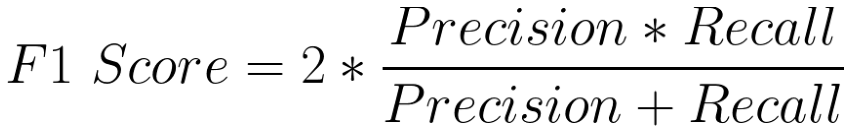

In [100]:
plt.figure(figsize=(15,15))
plt.imshow(im3)
plt.axis('off')
plt.show()